# COE782- ML - Lista3 - E2

## Dados câncer próstata
Resolução dos itens a),b),c),d) e f)

Aluno: Vivian de Carvalho Rodrigues

DRE:125228569 

In [1]:
#Importando as bibliotecas 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge, Lasso , SGDRegressor, HuberRegressor 
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.metrics import r2_score, mean_squared_error

#importa os dados do arquivo .csv na mesma pasta deste arquivo
df = pd.read_csv('dados_prostata.csv', sep ='\s+')

In [2]:
#Verificação da quantidade total de linhas
df.shape[0]

97

In [3]:
df.index = np.arange(df.shape[0])                  #para garantir que os registros variem em 0 até N-1. (N = df.shape[0])
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [4]:
#verificação de valores ausentes de cada atributo 
falt = df.isna().sum()                          
print(falt)

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64


In [5]:
#verificação valores faltantes de cada atributo (NaN)
falt = df.isnull().sum()                             
print(falt)

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64


In [6]:
#verifica quantidade de dados da coluna específica
df['train'].value_counts()

T    67
F    30
Name: train, dtype: int64

In [7]:
#caracterização estatítisca preliminar
df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [8]:
#matrix_correlacao
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_13044\3620422769.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_13044\417344172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sn.heatmap(df.corr(), annot = True,fmt=".1f",cmap = 'coolwarm')


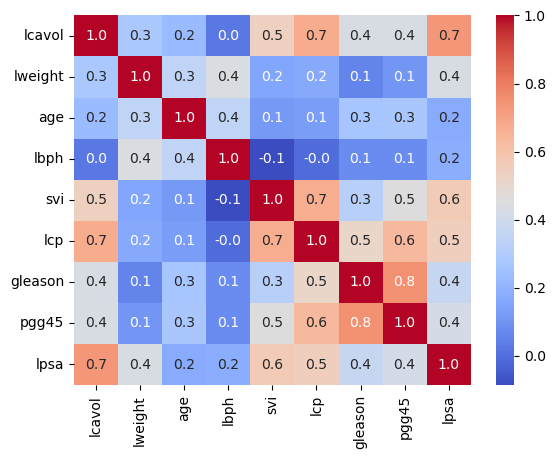

In [9]:
#matriz de correlação - dados não padronizados
plot = sn.heatmap(df.corr(), annot = True,fmt=".1f",cmap = 'coolwarm')
plot
plt.show()

In [10]:
#dados numéricos para padronização (desconsiderou-se as colunas de indices, "Train" e  "lpsa")
#Considera-se somente os dados de entrada 
data = df.iloc[:,:8].to_numpy()
data

array([[-5.79818495e-01,  2.76945900e+00,  5.00000000e+01,
        -1.38629436e+00,  0.00000000e+00, -1.38629436e+00,
         6.00000000e+00,  0.00000000e+00],
       [-9.94252273e-01,  3.31962600e+00,  5.80000000e+01,
        -1.38629436e+00,  0.00000000e+00, -1.38629436e+00,
         6.00000000e+00,  0.00000000e+00],
       [-5.10825624e-01,  2.69124300e+00,  7.40000000e+01,
        -1.38629436e+00,  0.00000000e+00, -1.38629436e+00,
         7.00000000e+00,  2.00000000e+01],
       [-1.20397280e+00,  3.28278900e+00,  5.80000000e+01,
        -1.38629436e+00,  0.00000000e+00, -1.38629436e+00,
         6.00000000e+00,  0.00000000e+00],
       [ 7.51416089e-01,  3.43237300e+00,  6.20000000e+01,
        -1.38629436e+00,  0.00000000e+00, -1.38629436e+00,
         6.00000000e+00,  0.00000000e+00],
       [-1.04982212e+00,  3.22882600e+00,  5.00000000e+01,
        -1.38629436e+00,  0.00000000e+00, -1.38629436e+00,
         6.00000000e+00,  0.00000000e+00],
       [ 7.37164066e-01,  3.473518

In [11]:
#criando as variáveis em tipo array para que sejam padronizados
lcavol = df['lcavol']                    #volume do cancer (tumor)
lweight = df['lweight']                  #log do peso da prostata
age = df['age']                          #idade
lbph = df['lbph']                        #log de hoperplasia benigna
svi = df['svi']                          #vesicula seminal
lcp = df['lcp']                          #capsula prostatica 
gleason = df['gleason']                  #critério gleason
pgg45 = df['pgg45']                      #porcetagem gleason
lpsa = df['lpsa']                        #antígeno específico - target

In [12]:
data.shape

(97, 8)

In [13]:
#a)padronização dos dados
scaler = StandardScaler()
scaler

StandardScaler()

In [14]:
#Padroniza e verifica a dimensão da matriz
datastd = scaler.fit_transform(data)
datastd.shape

(97, 8)

In [15]:
datastd

array([[-1.64586143, -2.01663373, -1.87210098, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.9993129 , -0.72575948, -0.79198919, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.58702059, -2.20015441,  1.36823439, -1.03002898, -0.52565748,
        -0.86765522,  0.34440695, -0.15615511],
       [-2.17817387, -0.8121913 , -0.79198919, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.5105128 , -0.46121762, -0.25193329, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-2.04670586, -0.93880639, -1.87210098, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.5226677 , -0.3646778 ,  0.01809466,  0.35670122, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.56020767, -0.20984103, -0.79198919,  0.99529051, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.81362657, -0.20984103

In [16]:
#dataframe com dados de entrada X padronizados

#inclui os dados y ('lpsa') originais
df_std_aux= pd.DataFrame(datastd, columns= ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']).merge(df['lpsa'],left_index= True, right_index = True)
#incluindo novamente as classes de treino e teste
df_std=df_std_aux.merge(df['train'],left_index= True, right_index = True)
df_std

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.430783,T
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519,T
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-0.162519,T
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519,T
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
92,1.262444,0.580608,0.558151,-1.030029,1.902379,1.079149,0.344407,1.269449,4.385147,T
93,2.107397,0.628738,-2.682185,-1.030029,1.902379,1.688267,0.344407,0.556647,4.684443,T
94,1.328267,-0.546127,-1.602073,-1.030029,1.902379,1.900197,0.344407,-0.512556,5.143124,F
95,1.307045,0.340141,0.558151,1.010033,1.902379,1.249088,0.344407,1.982251,5.477509,T


In [17]:
#caracterização estatítisca preliminar
df_std.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000
mean,4.578239e-17,6.844468e-16,4.131861e-16,-2.432190e-17,-3.662591e-17,3.662591e-17,-2.174664e-17,5.636957e-17,2.478387
std,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.154329
min,-2.300218e+00,-2.942386e+00,-3.087227e+00,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01,-0.430783
25%,-7.139973e-01,-5.937689e-01,-5.219612e-01,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01,1.731656
50%,8.264956e-02,-1.392703e-02,1.531086e-01,1.383966e-01,-5.256575e-01,-4.450983e-01,3.444069e-01,-3.343557e-01,2.591516
75%,6.626939e-01,5.806076e-01,5.581506e-01,1.010033e+00,-5.256575e-01,9.762744e-01,3.444069e-01,5.566470e-01,3.056357
max,2.107397e+00,2.701661e+00,2.043304e+00,1.542252e+00,1.902379e+00,2.216735e+00,3.128363e+00,2.695054e+00,5.582932


In [18]:
#matrix_correlacao
df_std.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_13044\2799390167.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std.corr()


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_13044\1308883536.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plotstd = sn.heatmap(df.corr(), annot = True,fmt=".1f",cmap = 'coolwarm')


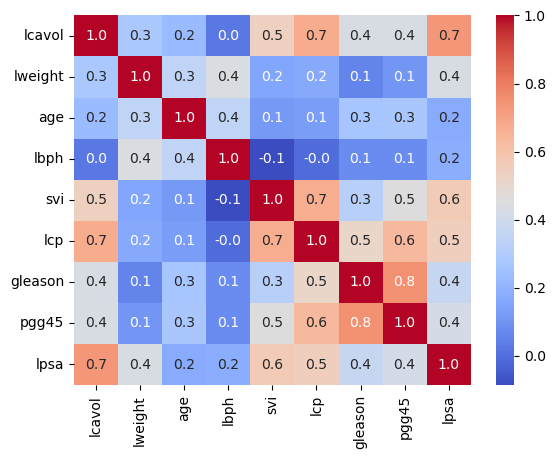

In [19]:
#matriz de correlação - dados padronizados
plotstd = sn.heatmap(df.corr(), annot = True,fmt=".1f",cmap = 'coolwarm')
plotstd
plt.show()

In [20]:
#b)divisão dos dados em treino e teste
#parcela de treino
dfs_train = df_std.loc[df_std['train'] == 'T']
dfs_train

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.430783,T
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519,T
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-0.162519,T
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519,T
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
90,1.617422,1.109520,0.558151,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,4.029806,T
91,1.008835,0.114086,-0.386947,0.864484,1.902379,-0.867655,0.344407,-0.334356,4.129551,T
92,1.262444,0.580608,0.558151,-1.030029,1.902379,1.079149,0.344407,1.269449,4.385147,T
93,2.107397,0.628738,-2.682185,-1.030029,1.902379,1.688267,0.344407,0.556647,4.684443,T


In [21]:
dfs_train.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,-0.031145,-0.006652,0.118851,-0.020034,0.017933,-0.025044,-0.029557,0.067260,2.452345
std,1.059748,1.118263,1.012903,1.014097,1.019749,1.006982,0.986723,1.044318,1.207812
min,-2.300218,-2.942386,-3.087227,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.430783
25%,-0.734930,-0.700575,-0.386947,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,1.667306
50%,0.100521,-0.071004,0.153109,-0.105070,-0.525657,-0.445098,0.344407,-0.334356,2.568788
75%,0.852048,0.597534,0.693165,1.002662,-0.525657,0.844097,0.344407,0.913048,3.365188
max,2.107397,2.701661,2.043304,1.542252,1.902379,2.038875,3.128363,2.695054,5.477509


In [22]:
#parcela de teste
dfs_test = df_std.loc[df_std['train'] == 'F']
dfs_test.shape

(30, 10)

In [23]:
dfs_test.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.069556,0.014856,-0.265435,0.044743,-0.040050,0.055933,0.066011,-0.150215,2.536547
std,0.884103,0.706046,0.950966,1.000675,0.987818,1.016066,1.059468,0.910482,1.042035
min,-1.813627,-1.792336,-2.817199,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,0.765468
25%,-0.472052,-0.350304,-0.521961,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,1.864393
50%,0.080638,0.050617,0.018095,0.234114,-0.525657,-0.180743,0.344407,-0.583836,2.591516
75%,0.599638,0.490136,0.524397,1.020164,-0.525657,0.910185,0.344407,0.378447,2.882004
max,1.809719,1.155640,0.828178,1.434884,1.902379,2.216735,3.128363,2.338652,5.582932


In [24]:
#organiza dados de entrada e saída do treinamento: 67 registros
X_train = dfs_train.iloc[:,:8].to_numpy()
y_train = dfs_train.iloc[:,8:9].to_numpy().reshape(67)

#organiza dados de entrada e saída de teste: 30 registros
X_test = dfs_test.iloc[:,:8].to_numpy()
y_test = dfs_test.iloc[:,8:9].to_numpy().reshape(30)

In [25]:
#verificação das dimensões dos datasets de treino e teste
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(67, 8) (30, 8)
(67,) (30,)


### Modelos não regularizados

In [26]:
#c)Treinamento - seleção de modelos
#Modelo linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [27]:
# Visualizar R^2 (Coeficiente de determinação)
print('Erro treino:', modelo.score(X_train, y_train))
print('Erro teste:', modelo.score(X_test, y_test))

Erro treino: 0.6943711796768238
Erro teste: 0.503379850238181


In [28]:
#predicoes
predt = modelo.predict(X_train)   #predicao dados de treinamento
pred = modelo.predict(X_test)     #predicao dados de teste

In [29]:
# Visualizar R^2 - função r2_score (Coeficiente de determinação) - verificação se é a mesma coisa do "score"
#r2_score(y_true, y_pred)
print('Erro treino:', r2_score(y_train, predt))
print('Erro teste:', r2_score(y_test, pred))

Erro treino: 0.6943711796768238
Erro teste: 0.503379850238181


In [30]:
#MSE
print('MSE treino:', mean_squared_error(y_train, predt))
print('MSE teste:', mean_squared_error(y_test, pred))

MSE treino: 0.43919976805833433
MSE teste: 0.5212740055076001


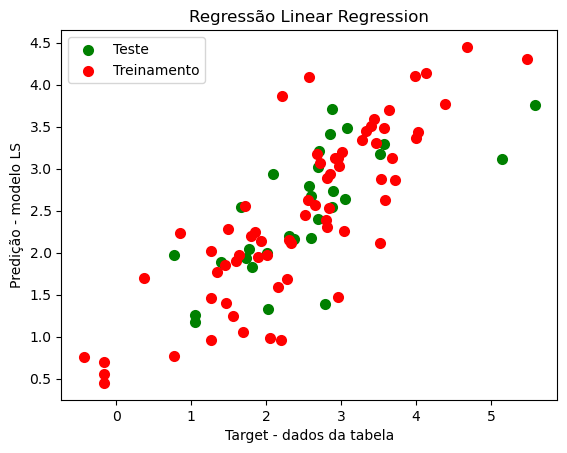

In [31]:
# Plot Resultados
plt.scatter(y_test , pred , color="green", linewidth=2, label = "Teste")
plt.scatter(y_train , predt , color="red", linewidth=2, label = "Treinamento")
plt.xlabel("Target - dados da tabela")
plt.ylabel("Predição - modelo LS")
plt.legend()
plt.title("Regressão Linear Regression")
plt.show()

In [32]:
#Gradiente descendente estocástico
modeloSGD = SGDRegressor(loss='squared_error', penalty=None) 
modeloSGD.fit(X_train, y_train)

SGDRegressor(penalty=None)

In [33]:
# Visualizar R^2
print('Erro treino:', modeloSGD.score(X_train, y_train))
print('Erro teste:', modeloSGD.score(X_test, y_test))

Erro treino: 0.6838060272524872
Erro teste: 0.5189531730331597


In [34]:
predt = modeloSGD.predict(X_train)   #predicao dados de treinamento
pred = modeloSGD.predict(X_test)     #predicao dados de teste

In [35]:
# Visualizar R^2 - função r2_score
#r2_score(y_true, y_pred)
print('Erro treino:', r2_score(y_train, predt))
print('Erro teste:', r2_score(y_test, pred))

Erro treino: 0.6838060272524872
Erro teste: 0.5189531730331597


In [36]:
#MSE
print('MSE treino:', mean_squared_error(y_train, predt))
print('MSE teste:', mean_squared_error(y_test, pred))

MSE treino: 0.4543822776441874
MSE teste: 0.5049275718071253


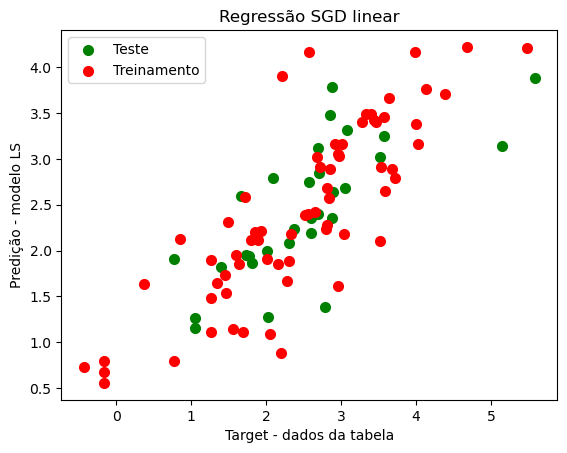

In [37]:
# Plot Resultados
plt.scatter(y_test , pred , color="green", linewidth=2, label = "Teste")
plt.scatter(y_train , predt , color="red", linewidth=2, label = "Treinamento")
plt.xlabel("Target - dados da tabela")
plt.ylabel("Predição - modelo LS")
plt.legend()
plt.title("Regressão SGD linear")
plt.show()

In [38]:
#HuberRegressor
modeloHuber = HuberRegressor(epsilon=1, alpha=0.0)
modeloHuber.fit(X_train, y_train)

HuberRegressor(alpha=0.0, epsilon=1)

In [39]:
# Visualizar R^2
print('Erro treino:', modeloHuber.score(X_train, y_train))
print('Erro teste:', modeloHuber.score(X_test, y_test))

Erro treino: 0.6779463869319409
Erro teste: 0.5232254164398835


In [40]:
predt = modeloHuber.predict(X_train)   #predicao dados de treinamento
pred = modeloHuber.predict(X_test)     #predicao dados de teste

In [41]:
# Visualizar R^2 - função r2_score
#r2_score(y_true, y_pred)
print('Erro treino:', r2_score(y_train, predt))
print('Erro teste:', r2_score(y_test, pred))

Erro treino: 0.6779463869319409
Erro teste: 0.5232254164398835


In [42]:
#MSE
print('MSE treino:', mean_squared_error(y_train, predt))
print('MSE teste:', mean_squared_error(y_test, pred))

MSE treino: 0.46280279461954305
MSE teste: 0.500443240202388


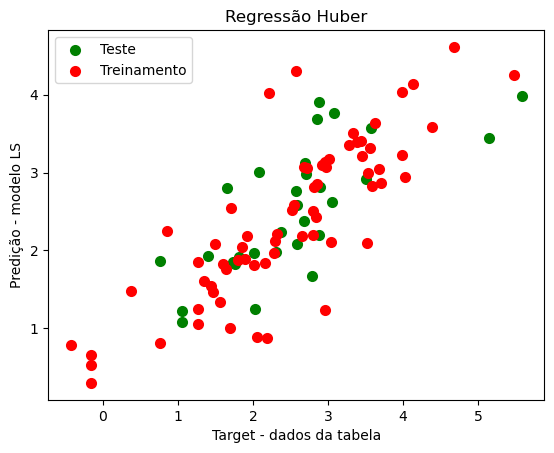

In [43]:
# Plot Resultados
plt.scatter(y_test , pred , color="green", linewidth=2, label = "Teste")
plt.scatter(y_train , predt , color="red", linewidth=2, label = "Treinamento")
plt.xlabel("Target - dados da tabela")
plt.ylabel("Predição - modelo LS")
plt.legend()
plt.title("Regressão Huber")
plt.show()

### Modelos com regularização

In [44]:
#d)Treinamento - seleção de modelos
#Incluindo regularização no modelo linear
#When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object. 
#For numerical reasons, using alpha = 0 with the Ridge object is not advised. 
#Instead, you should use the LinearRegression object

freg = 0.25              #fator de regularização - lambda do Bishop

ridge = Ridge(alpha=freg, solver="auto")
ridge.fit(X_train, y_train)
ridge.intercept_, ridge.coef_

(2.465157141230092,
 array([ 0.67014232,  0.26171405, -0.1390221 ,  0.20844519,  0.30203826,
        -0.27887077, -0.01872168,  0.2608539 ]))

In [45]:
# Visualizar R^2 - Ridge
print('Erro treino:', ridge.score(X_train, y_train))
print('Erro teste:', ridge.score(X_test, y_test))

Erro treino: 0.6943495719742855
Erro teste: 0.505623259364695


In [46]:
#MSE

#predicoes
predt = ridge.predict(X_train)     #predicao dados de treinamento
pred = ridge.predict(X_test)     #predicao dados de teste


print('MSE treino:', mean_squared_error(y_train, predt))
print('MSE teste:', mean_squared_error(y_test, pred))

MSE treino: 0.43923081911540757
MSE teste: 0.5189192261819301


In [47]:
#Lasso
#When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object. 
#For numerical reasons, using alpha = 0 with the Ridge object is not advised. 
#Instead, you should use the LinearRegression object
lasso = Lasso(alpha=freg, max_iter=1000)
lasso.fit(X_train, y_train)
lasso.intercept_, lasso.coef_

(2.4686441972302338,
 array([0.52364644, 0.16212162, 0.        , 0.        , 0.06067155,
        0.        , 0.        , 0.        ]))

In [48]:
# Visualizar R^2 - Lasso
print('Erro treino:', lasso.score(X_train, y_train))
print('Erro teste:', lasso.score(X_test, y_test))

Erro treino: 0.5680596439094503
Erro teste: 0.5206076293233663


In [49]:
#MSE

#predicoes
predt = lasso.predict(X_train)     #predicao dados de treinamento
pred = lasso.predict(X_test)     #predicao dados de teste


print('MSE treino:', mean_squared_error(y_train, predt))
print('MSE teste:', mean_squared_error(y_test, pred))

MSE treino: 0.6207140544187021
MSE teste: 0.5031909828714028


In [50]:
#Gradiente descendente estocástico - regularizado
#Ridge
modeloSGDl2 = SGDRegressor(loss='squared_error', penalty='l2', alpha=freg)
modeloSGDl2.fit(X_train, y_train)

SGDRegressor(alpha=0.25)

In [51]:
# Visualizar R^2 - SGD - l2
print('Erro treino:', modeloSGDl2.score(X_train, y_train))
print('Erro teste:', modeloSGDl2.score(X_test, y_test))

Erro treino: 0.6644804971068654
Erro teste: 0.5287091980571441


In [52]:
#MSE

#predicoes
predt = modeloSGDl2.predict(X_train)     #predicao dados de treinamento
pred = modeloSGDl2.predict(X_test)     #predicao dados de teste


print('MSE treino:', mean_squared_error(y_train, predt))
print('MSE teste:', mean_squared_error(y_test, pred))

MSE treino: 0.48215376970631146
MSE teste: 0.4946872256501605


In [53]:
#Lasso
modeloSGDl1 = SGDRegressor(loss='squared_error', penalty='l1', alpha=freg)
modeloSGDl1.fit(X_train, y_train)

SGDRegressor(alpha=0.25, penalty='l1')

In [54]:
# Visualizar R^2 - SGD - l1
print('Erro treino:', modeloSGDl1.score(X_train, y_train))
print('Erro teste:', modeloSGDl1.score(X_test, y_test))

Erro treino: 0.5670635136466637
Erro teste: 0.5179846568761581


In [55]:
#MSE

#predicoes
predt = modeloSGDl1.predict(X_train)     #predicao dados de treinamento
pred = modeloSGDl1.predict(X_test)     #predicao dados de teste


print('MSE treino:', mean_squared_error(y_train, predt))
print('MSE teste:', mean_squared_error(y_test, pred))

MSE treino: 0.622145529957917
MSE teste: 0.5059441682879592


In [56]:
#HuberRegressor
modeloHuber = HuberRegressor(epsilon=1, alpha=freg)
modeloHuber.fit(X_train, y_train)

HuberRegressor(alpha=0.25, epsilon=1)

In [57]:
# Visualizar R^2
print('Erro treino:', modeloHuber.score(X_train, y_train))
print('Erro teste:', modeloHuber.score(X_test, y_test))

Erro treino: 0.678841034362982
Erro teste: 0.5207955317758662


In [58]:
predt = modeloHuber.predict(X_train)   #predicao dados de treinamento
pred = modeloHuber.predict(X_test)     #predicao dados de teste

In [59]:
# Visualizar R^2 - função r2_score
#r2_score(y_true, y_pred)
print('Erro treino:', r2_score(y_train, predt))
print('Erro teste:', r2_score(y_test, pred))

Erro treino: 0.678841034362982
Erro teste: 0.5207955317758662


In [60]:
#MSE
print('MSE treino:', mean_squared_error(y_train, predt))
print('MSE teste:', mean_squared_error(y_test, pred))

MSE treino: 0.46151715361293955
MSE teste: 0.502993752323858
